# Data preparation

## 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [13]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

## 2. Download data from Kaggle

In [3]:
!kaggle competitions download -c dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


## Décompresser les Données

In [9]:
import zipfile

with zipfile.ZipFile("dogs-vs-cats.zip", 'r') as zip_ref:
    zip_ref.extractall("dogs-vs-cats")

### Vérifier les Fichiers Décompressés
print(os.listdir("dogs-vs-cats"))

['sampleSubmission.csv', 'test1.zip', 'train.zip']
Le dossier 'train' contient 0 images.
Le dossier 'test' contient 0 images.


### Extraire les fichiers ZIP

In [12]:
train_dir = "dogs-vs-cats/train"  
test_dir = "dogs-vs-cats/test1"  

# Extraire le fichier train.zip
with zipfile.ZipFile(train_dir+".zip", 'r') as zip_ref:
    zip_ref.extractall(train_dir)

# Extraire le fichier test1.zip
with zipfile.ZipFile(test_dir+".zip", 'r') as zip_ref:
    zip_ref.extractall(test_dir)

train_num_images = sum([len(files) for r, d, files in os.walk(train_dir)])
test_num_images = sum([len(files) for r, d, files in os.walk(test_dir)])

print(f"found {train_num_images} images in 'train' folder.")
print(f"found {test_num_images} images in 'test' folder.")

Le dossier 'train' contient 25000 images.
Le dossier 'test' contient 12500 images.


In [ ]:
import shutil

# Dossiers pour stocker les images de chats et de chiens
cats_dir = "DATASET/cats"
dogs_dir = "DATASET/dogs"

# Créez les dossiers si nécessaire
os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

train_dir = os.path.join(train_dir,"train")
# Parcours des fichiers dans le dossier train
for filename in os.listdir(train_dir):
    if filename.endswith(".jpg"):  # Vérifier les fichiers d'images
        # Vérifier si le nom de fichier contient "cat" ou "dog"
        if "cat" in filename:
            # Déplacer l'image dans le dossier des chats
            shutil.move(os.path.join(train_dir, filename), os.path.join(cats_dir, filename))
        elif "dog" in filename:
            # Déplacer l'image dans le dossier des chiens
            shutil.move(os.path.join(train_dir, filename), os.path.join(dogs_dir, filename))

print("Les images ont été organisées dans les dossiers cats et dogs.")

Les images ont été organisées dans les dossiers cats et dogs.


# Apprentissage automatique

## 1. Load data

In [20]:
data = tf.keras.utils.image_dataset_from_directory('DATASET')

Found 25000 files belonging to 2 classes.


## 2. Scale data

In [21]:
data = data.map(lambda x,y: (x/255, y))

## 3. Split data

In [23]:
# define size of each directory
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

print(len(data))
print(f"tain + val + test = {train_size + val_size + test_size}")

782
tain + val + test = 782


In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 4. Build Deep Learning Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)      

## 5. Train model

In [27]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


547/547 [==============================] - 286s 520ms/step - loss: 0.6626 - accuracy: 0.6055 - val_loss: 0.6208 - val_accuracy: 0.6631
Epoch 2/20
547/547 [==============================] - 237s 432ms/step - loss: 0.5350 - accuracy: 0.7337 - val_loss: 0.5124 - val_accuracy: 0.7538
Epoch 3/20
547/547 [==============================] - 250s 456ms/step - loss: 0.4414 - accuracy: 0.7932 - val_loss: 0.4917 - val_accuracy: 0.7688
Epoch 4/20
547/547 [==============================] - 288s 527ms/step - loss: 0.3549 - accuracy: 0.8403 - val_loss: 0.5260 - val_accuracy: 0.7694
Epoch 5/20
547/547 [==============================] - 410s 748ms/step - loss: 0.2450 - accuracy: 0.8956 - val_loss: 0.6913 - val_accuracy: 0.7634
Epoch 6/20
547/547 [==============================] - 627s 1s/step - loss: 0.1565 - accuracy: 0.9375 - val_loss: 0.8436 - val_accuracy: 0.7550
Epoch 7/20
547/547 [==============================] - 436s 796ms/step - loss: 0.0894 - accuracy: 0.9676 - val_loss: 1.0526 - 

## 5.1. Save model

In [28]:
import numpy as np

SAVE_DIR = "dogs_vs_cats_results"

model.save(os.path.join(SAVE_DIR, f"model.h5"))
np.save(os.path.join(SAVE_DIR, f"history.npy"), hist.history)

c:\Users\gbencheikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 5.2 Plot performance

<function matplotlib.pyplot.show(close=None, block=None)>

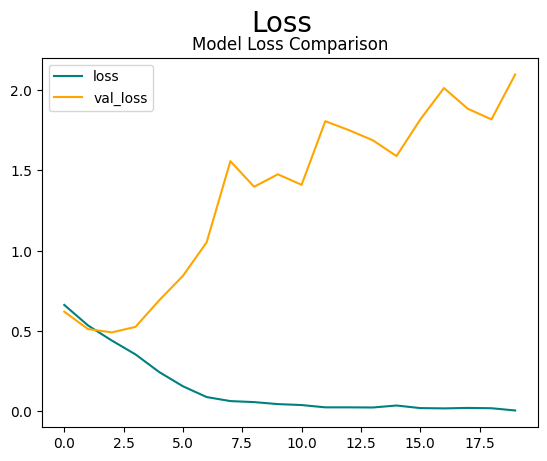

In [30]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.title('Model Loss Comparison')

plt.savefig(os.path.join(SAVE_DIR, "model_accuracy_loss_plot.png"))
plt.show

## 6. Validation

In [81]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# Initialize metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    for idx, img in enumerate(batch[0]):
        img = np.expand_dims(img, axis=0)  
        prediction = model.predict(img, verbose=False)
        
        predicted_label = tf.convert_to_tensor([1] if prediction[0][0] > 0.5 else [0])  
        true_label = tf.convert_to_tensor([batch[1][idx]])

        # Update metrics
        pre.update_state(true_label, predicted_label)
        re.update_state(true_label, predicted_label)
        acc.update_state(true_label, predicted_label)

# Print the final results after all batches
print(f"Precision: {pre.result().numpy()}")
print(f"Recall: {re.result().numpy()}")
print(f"Accuracy: {acc.result().numpy()}")

Precision: 0.7371469736099243
Recall: 0.791601836681366
Accuracy: 0.7480031847953796


## 7. Test

1/1 [==============================] - 0s 25ms/step


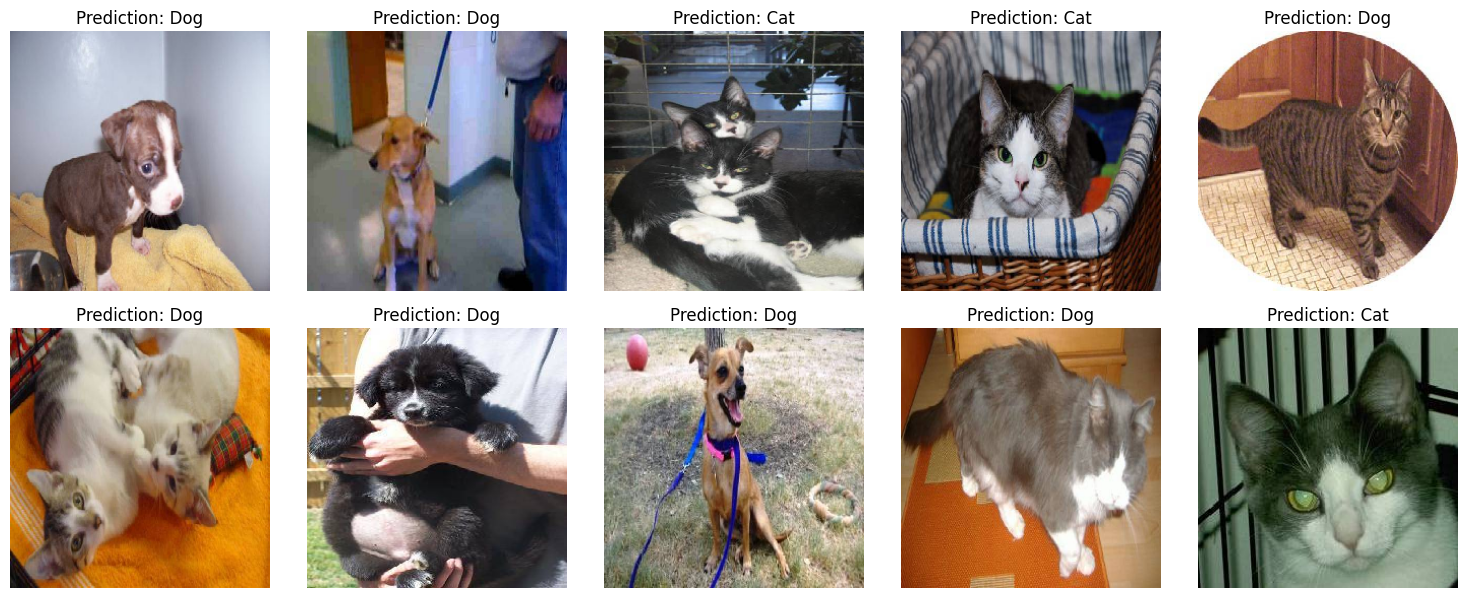

In [ ]:
import random

# Get all image file names
image_files = [os.path.join("dogs-vs-cats/test1/test1", file) for file in os.listdir("dogs-vs-cats/test1/test1") if file.endswith(('.jpg', '.png'))]

# Randomly select 10 images
random_images = random.sample(image_files, 10)

# Plot the images with predictions
plt.figure(figsize=(15, 15))

for i, image_path in enumerate(random_images):
    img = tf.keras.utils.load_img(image_path, target_size=(256, 256))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array, verbose=False)

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Prediction: {'Dog' if prediction[0][0] > 0.5 else 'Cat'}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# PostProcessing

# 1. Générer la carte de chaleur Grad-CAM

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # Obtenir le modèle pour la carte de chaleur Grad-CAM
    grad_model = Model(
        [model.inputs], 
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Calculer le gradient de la classe prédite par rapport à la dernière couche de convolution
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        predicted_class = tf.argmax(predictions[0])
        loss = predictions[:, predicted_class]

    grads = tape.gradient(loss, conv_outputs)

    # Calculer la moyenne des gradients le long de l'axe de profondeur (canal)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiplier chaque canal par son poids moyen
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

    # Appliquer ReLU pour ne conserver que les valeurs positives
    heatmap = tf.maximum(heatmap, 0)

    # Normaliser la carte de chaleur
    heatmap /= tf.reduce_max(heatmap)
    return heatmap.numpy()

# Fonction pour superposer la carte de chaleur sur l'image originale
def superimpose_heatmap(img, heatmap, alpha=0.4):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)
    return superimposed_img


# 2. Test

1/1 [==============================] - 0s 29ms/step


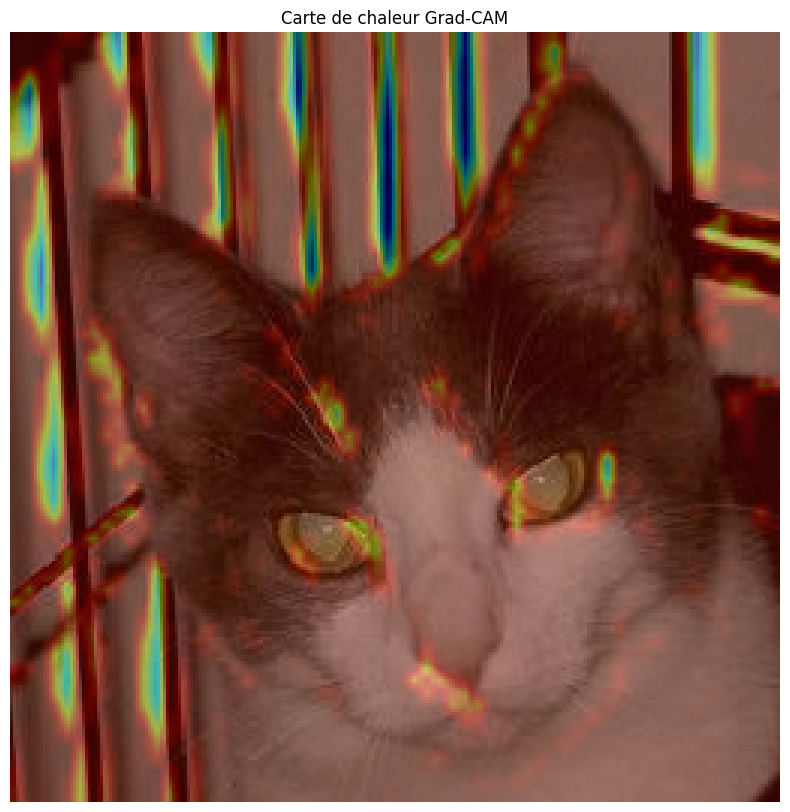

In [80]:
# Charger une image de test
image_path = random.choice(random_images)
img = tf.keras.utils.load_img(image_path, target_size=(256, 256))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0
prediction = model.predict(img_array)

# Générer la carte de chaleur
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2")

# Superposer la carte de chaleur sur l'image originale
superimposed_img = superimpose_heatmap(np.array(img, dtype=np.uint8), heatmap)

# Afficher l'image avec la carte de chaleur
plt.figure(figsize=(10, 10))
plt.imshow(superimposed_img)
plt.title("Carte de chaleur Grad-CAM")
plt.axis("off")
plt.show()